In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
import numpy as np

try:
    df = pd.read_csv("waterQuality1.csv", sep=",", encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv("waterQuality1.csv", sep=",", encoding='latin1')
df = df.replace('#NUM!', np.nan)
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
print(df.head())
y = df['is_safe']
X = df.drop(columns = ['is_safe'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  is_saf

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

models = [('Random Forest', rf), ('Extra Trees', et), ('AdaBoost', ada), ('Gradient Boosting', gb)]
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Random Forest Accuracy: 0.96
Extra Trees Accuracy: 0.93
AdaBoost Accuracy: 0.93
Gradient Boosting Accuracy: 0.96


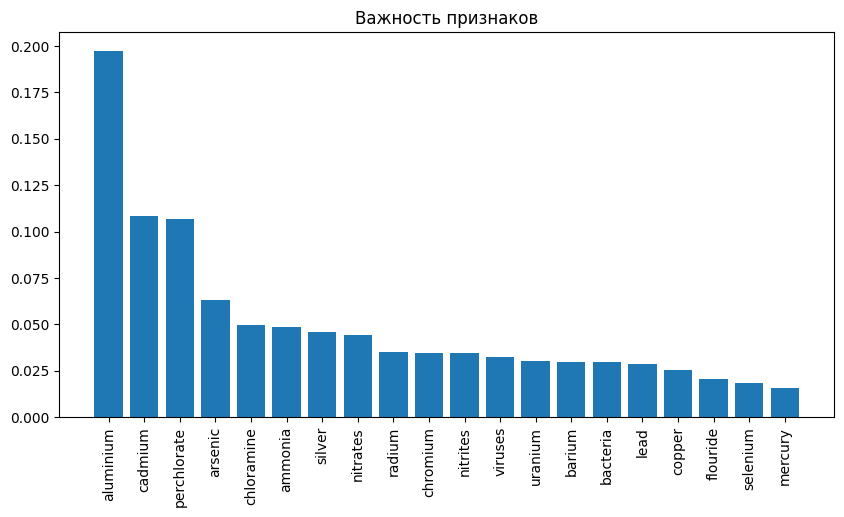

In [ ]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

names = [X.columns[i] for i in indices]

plt.figure(figsize=(10, 5))
plt.title("Важность признаков")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()